# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\Administrator\Desktop\DataImmersion'

# Importing Final Merged Data

In [3]:
## Importing  latest merged dataset
df_final_data = pd.read_pickle(os.path.join(path, 'chapter4', 'Prepared data', 'Final_data_Task9_Part1.pkl'))

In [4]:
df_final_data.shape

(32404859, 35)

In [5]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Surname,Gender,State,Age,date_joined,no_of_dependants,family_status,income,STATE,_merge
0,1,Chocolate Sandwich Cookies,61,19,5,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
1,1,Chocolate Sandwich Cookies,61,19,5,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
2,907,Premium Sliced Bacon,106,12,20,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
3,907,Premium Sliced Bacon,106,12,20,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
4,1000,Apricots,18,10,12,505689,138,9,6,12,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both


#  Create a histogram of the “order_hour_of_day” column.

In [6]:
df_final_data.loc[df_final_data['prices'] >100,'prices'] = np.nan

In [7]:
df_final_data['prices'].max()

25.0

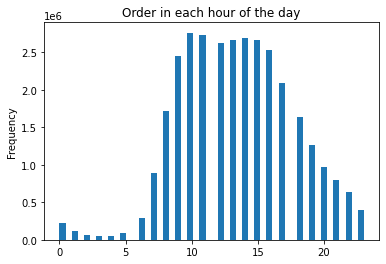

In [8]:
hist = df_final_data['order_hour_of_day'].plot.hist(bins=50,xlabel='Time',title='Order in each hour of the day')

This histogram shows the sales/ orders per hour of the day. I has the bell shape and gap in the middle. Orders get increase in the morning after 8 AM and having highest number of orders at 10 AM. Again after 3 PM in the evening, orders get decreasing. Very few orders are placed through the hours of the night.

In [9]:
# Saving histogram with bins 50
hist.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'histogram_order_hour_day.png'))

# Create a bar chart from the “loyalty_flag” column. 

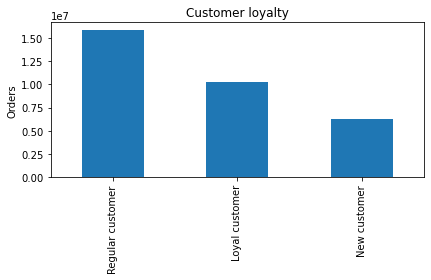

In [10]:
bar =df_final_data['loyalty_flag'].value_counts().plot.bar(ylabel='Orders',title= 'Customer loyalty')
plt.tight_layout()

From this bar plot, we can see the distribution of orders among customers in terms of loyalty and most of the customers are in 'Regular' category

In [11]:
# Saving bar plot in folder
bar.figure.savefig(os.path.join(path, 'chapter4','visualization', 'bar_loyalty.png'))

## Line Chart 

In [12]:
# First we will do the sampling
# setting the seed
np.random.seed(4)

In [13]:
# Create list holding true false values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(df_final_data)) <= 0.7

In [14]:
# Stores 70% of sample in big dataframe
big = df_final_data[dev]

In [15]:
# Stores 30% of sample in small dataframe
small = df_final_data[~dev]

In [16]:
len(df_final_data)

32404859

In [17]:
len(big)+ len(small)

32404859

In [18]:
# Create new dataframe  that contains only the “prices” and “order_hour_of_day” columns from your small subset.
df_subset = small[['order_hour_of_day','prices']]

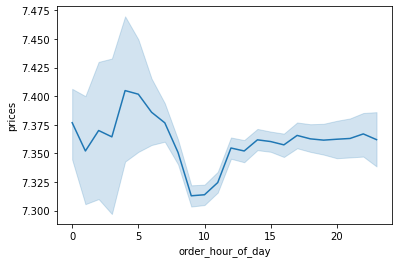

In [19]:
line = sns.lineplot(data = df_subset, x = 'order_hour_of_day', y = 'prices')

From almost 22 hour (late night)to  04 hour(early morning) the order prices are low.


In [20]:
# Saving sample line plot 
line.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'line_plot_sample.png'))

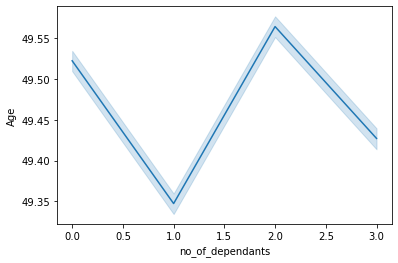

In [21]:
# Creating line plot to see the relationship between age and number of dependents
line_Age_dependents = sns.lineplot(data = df_final_data, x = 'no_of_dependants',y = 'Age')

In the graph above, x-axis shows the number of dependent and the y-axis shows the average age, showing the relationship between the number of dependents and age. From graph, I am not able to see any relationship between the average age of customers and number of dependents.

In [22]:
# Saving line plot 
line_Age_dependents.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'line_plot_age_dep.png'))

# Scatterplot

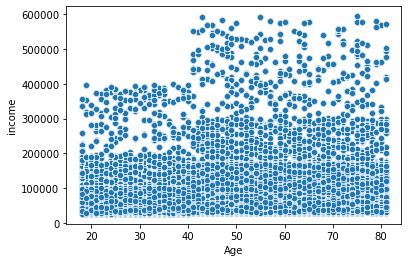

In [23]:
#connection between age and spending power
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_final_data)

The Scatterplot shows us that as people get older they get more income and therefore more spending power. We can see a increase in concentration plots just after the 40 year mark.

In [24]:
# Saving scatter plot 
scatterplot_age_income.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'scatterplot_age_income.png'))

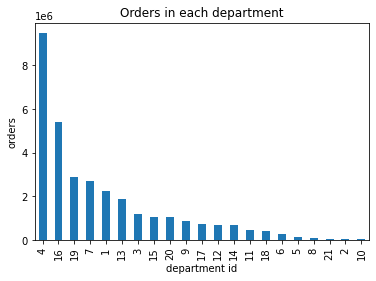

In [25]:
bar_dept = df_final_data['department_id'].value_counts().plot.bar(ylabel='orders',xlabel='department id', title='Orders in each department')

In [26]:
# Saving bar plot in folder
bar_dept.figure.savefig(os.path.join(path, 'chapter4','visualization', 'bar_dept.png'))